# **About Project: IMDB Movie Analysis**
#### **Objective:**

As a data analyst intern at IMDB, you have been tasked with exploring and analyzing the IMDB Movies dataset. Your goal is to answer specific business questions, gain insights into movie trends, and deliver actionable recommendations. Using Python and libraries such as Pandas, NumPy, Seaborn, and Matplotlib, perform analysis to help IMDB better understand genre popularity, rating trends, and factors influencing 
movie success.
#### **Tools and Libraries Used** 
- **`Python`**  
- **`Pandas`**: Data manipulation and analysis  
- **`NumPy`**: Numerical computations  
- **`Matplotlib`**: Data visualization  
- **`Seaborn`**: Advanced visualization  
#### **About Company**
IMDb (Internet Movie Database) is a comprehensive online database of information about films, television shows, video games, and online streaming content. It includes details such as cast and crew, plot summaries, user reviews, trivia, and ratings. Established in 1990, IMDb has become one of the most popular platforms for movie enthusiasts and industry professionals alike. It features user-generated content, professional critiques, and a proprietary rating system based on user votes. Owned by Amazon since 1998, IMDb also offers a subscription service, IMDbPro, providing industry-focused features like contact information and production updates.
#### **Dataset Overview** 
The dataset includes the following columns:  
- **`names`**: Movie titles  
- **`date_x`**: Release dates  
- **`score`**: IMDB ratings  
- **`genre`**: Genres  
- **`overview`**: Movie summaries  
- **`crew`**: Cast and crew information  
- **`orig_title`**: Original titles  
- **`status`**: Release status (e.g., released, post-production)  
- **`orig_lang`**: Original language  
- **`budget_x`**: Production budgets  
- **`revenue`**: Box office revenues  
- **`country`**: Production country  

## **Loading the dataset and Perform initial setup**
**Task: Load the dataset and perform initial setup**

In [62]:
# Importing necessary libraries for the project
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Loading the dataset
Data ="imdb_movies.csv"
df = pd.read_csv(Data)

# Display the top 5 rows of datasets
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


## **Data Overview and Basic Exploration**
**Task: Explore the structure and composition of the dataset**

In [64]:
# Display the shape and first few rows of the dataset
print("Shape of the dataset:", df.shape)

df.info()

Shape of the dataset: (10178, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [65]:
# Checking for missing values and their counts
df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [66]:
#The issue is with the date_x column as its dtype is given as object
#Convert data type of date_x into datetime 
df["date_x"]= pd.to_datetime(df["date_x"])

In [67]:
# Checking the datatype again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10093 non-null  object        
 4   overview    10178 non-null  object        
 5   crew        10122 non-null  object        
 6   orig_title  10178 non-null  object        
 7   status      10178 non-null  object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  float64       
 10  revenue     10178 non-null  float64       
 11  country     10178 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 954.3+ KB


## **Data Cleaning**
**Task: Address missing values, data types, and outliers.**

In [68]:
#Missing Values
#Genre column have 85 missing values which contains Genres of movies
#Filling Genre with "Unavaiable" as its an object type 
df["genre"]=df["genre"].fillna("unavaiable")

In [69]:
#Crew column have 56 missing values which contains Cast and crew information  
#Filling it same with "Unavaiable" as its also an object type
df["crew"]=df["crew"].fillna("unavaiable")

## **Univariate Analysis: Explore each column individually**
**Task: Perform univariate analysis on numerical and categorical variables**

In [70]:
#What is the distribution of movie runtimes? Plot a histogram and describe its shape.

df["year"] = df["date_x"].dt.strftime("%Y")
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,year
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US,2016
10174,Delta Force 2: The Colombian Connection,1990-08-24,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US,1990
10175,The Russia House,1990-12-21,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US,1990
10176,Darkman II: The Return of Durant,1995-07-11,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US,1995


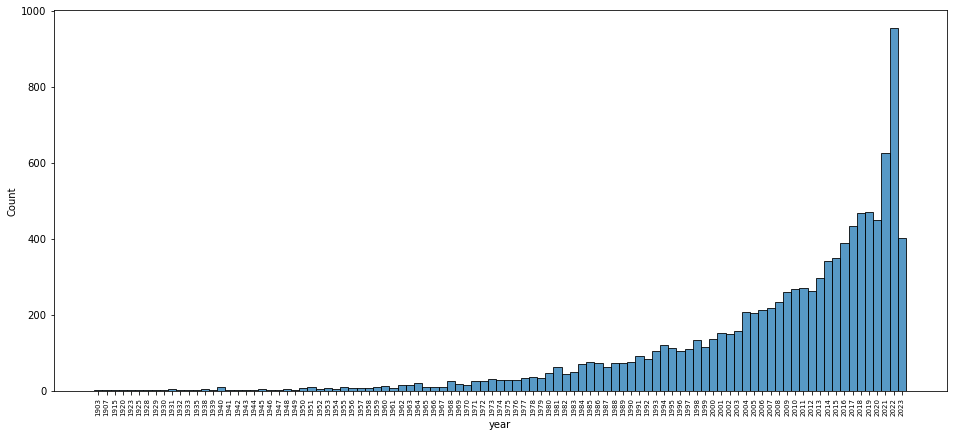

The count of movies by year shows that:


In [71]:


# Plotting the count of movies by year.
df= df.sort_values(by ="year")
plt.figure(figsize = (16,7))
sns.histplot(data = df,x = "year",bins = 30)
plt.xticks(rotation =90 ,fontsize = 7)
plt.show()


# Description of the shape
print("The count of movies by year shows that:")
#print("- It appears to be approximately normal but slightly left-skewed (tail on the lower end).")
#print("- Most scores are concentrated between 50 and 80, with a gradual decline outside this range.")
#print("- There are very few movies with extremely low or perfect scores (0 or 100).")

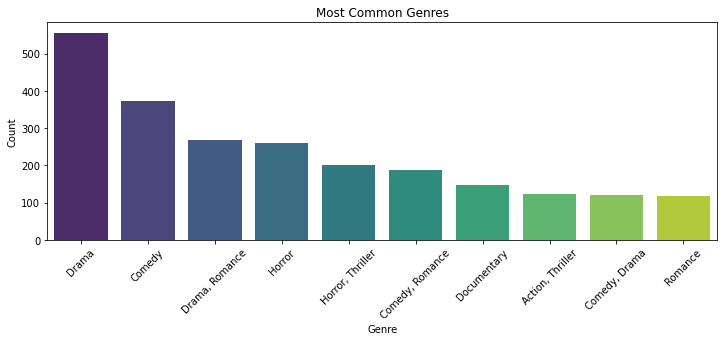

The most common genre in the dataset is: Drama


In [72]:
# What are the most common genres in the dataset? Use a bar chart to show their distribution.

# Group by genre and count the number of movies
gb = df.groupby("genre").agg({"names": "count"})
gb = gb.sort_values(by="names", ascending=False)
gb = gb.head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 4))
sns.barplot(x=gb.index,y=gb["names"],data=gb,hue=gb.index,palette = "viridis")
plt.title("Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Print the most common genre
most_common_genre = gb.index[0]
print(f"The most common genre in the dataset is: {most_common_genre}")

## **Bivariate Analysis: Explore relationships between two variables**
**Task: Use scatter plots, box plots, and correlation analysis**

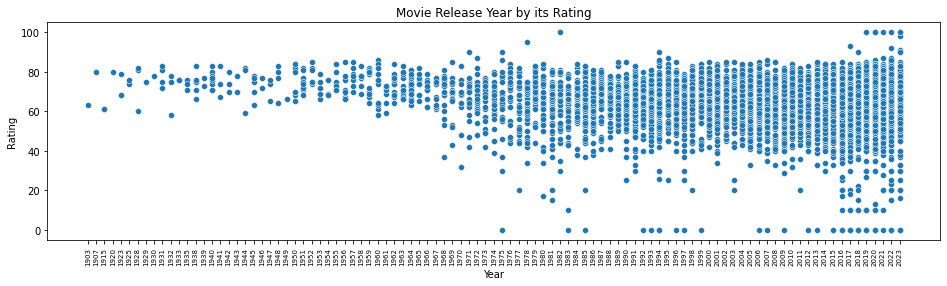

In [73]:
#Is there a relationship between a movie’s release year and its rating? Plot a scatter plot and describe any observed trend.

# Plotting the Scatter plot
plt.figure(figsize = (16,4))
sns.scatterplot(x="year", y = "score",data = df)
plt.title("Movie Release Year by its Rating")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.xticks(rotation = 90, fontsize = 7)
plt.show()




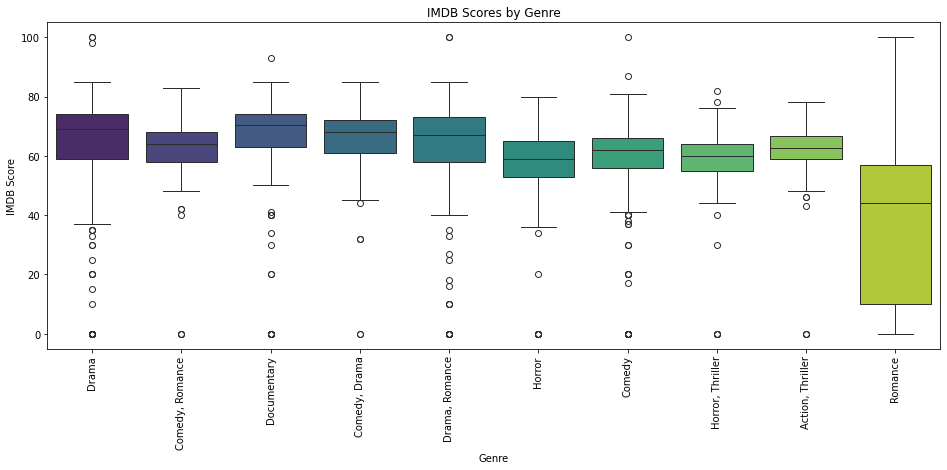

In [74]:
#How do ratings vary by genre? Use a boxplot to visualize the differences in ratings across genres.

# Boxplot for IMDB score across countries
top_countries = df["genre"].value_counts().head(10).index  # Top 10 countries by movie count
plt.figure(figsize=(16,6))
sns.boxplot(data=df[df["genre"].isin(top_countries)], x="genre", y="score", hue="genre", palette="viridis", legend=False)
plt.title("IMDB Scores by Genre")
plt.xlabel("Genre")
plt.ylabel("IMDB Score")
plt.xticks(rotation=90)
plt.show()



In [75]:
#Is there a correlation between the number of votes a movie received and its rating? Create a scatter plot and calculate the correlation coefficient.
# Create a dataframe to store score, budget and revenue and find it's correlation
df1 = df[["score", "budget_x", "revenue"]]
df1.columns = ["Score","Budget", "Revenue"]
corr = df1.corr()
corr

,Score,Budget,Revenue
Score,1.000000,-0.23547,0.096533
Budget,-0.235470,1.00000,0.673830
Revenue,0.096533,0.67383,1.000000


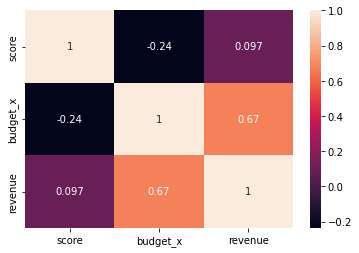

The Correlation between budget, score and revenue:
- Score and Budget: A weak negative correlation of -0.235, meaning as the budget increases, the score slightly decreases..
- Score and Revenue: A very weak positive correlation of 0.097, suggesting little to no relationship between score and revenue.
-Budget and Revenue: A moderate positive correlation of 0.674, indicating that as the budget increases, revenue tends to increase as well


In [76]:
#correlation between `budget_x`, 'revenue' and `score`. 
correlation = df[["score","budget_x","revenue"]]
data = correlation.corr()
sns.heatmap(data, annot = True)
plt.show()

# Description 
print("The Correlation between budget, score and revenue:")
print("- Score and Budget: A weak negative correlation of -0.235, meaning as the budget increases, the score slightly decreases..")
print("- Score and Revenue: A very weak positive correlation of 0.097, suggesting little to no relationship between score and revenue.")
print("-Budget and Revenue: A moderate positive correlation of 0.674, indicating that as the budget increases, revenue tends to increase as well")

## **Genre-Specific Analysiss**
**Task: Delve deeper into the genre of movies**

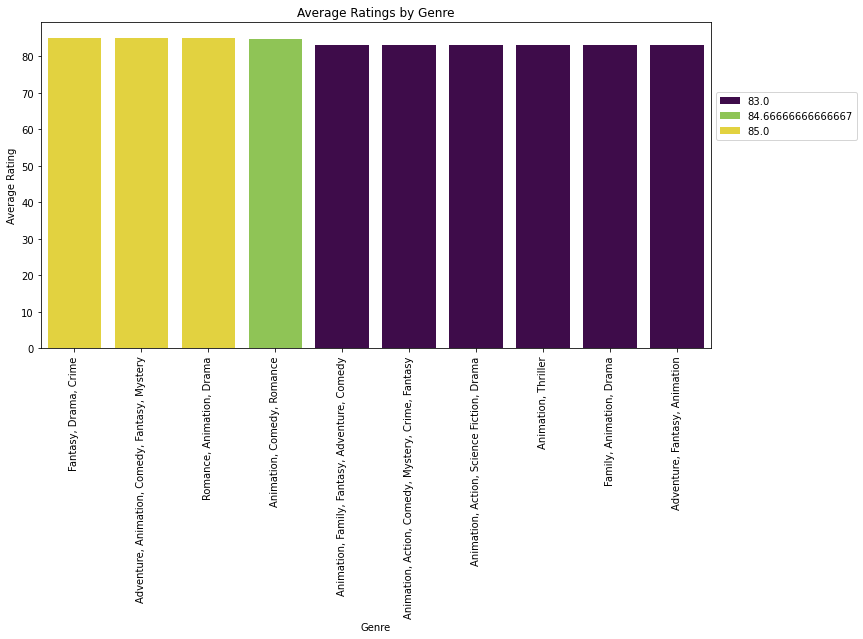

In [77]:
# Which genre has the highest average rating? Calculate the average rating for each genre and plot the results.

# Plot the graph of average score across genres 
gb = df.groupby("genre").agg({"score":"mean"})
gb = gb.sort_values(by = "score", ascending = False)
gb= gb.head(10)

plt.figure(figsize=(12,6))
sns.barplot(data = gb, x = gb.index, y = gb["score"], hue = "score", palette = "viridis")
plt.title("Average Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.legend(bbox_to_anchor = (1,0.8))
plt.xticks(rotation = 90)
plt.show()



 

In [78]:
# How does the popularity of genres vary over time? Plot the number of movies released per genre each year.
gb = df.groupby(["year","genre"]).agg({"date_x":"count"})
gb    # For plotting we are not giving hue of genres as that would be very huge.(2300 genres are there)

date_x
year genre                                 
1903 Drama, History                       1
1907 Adventure, Science Fiction           1
1915 Drama, History, War                  2
1920 Drama, Horror, Thriller, Crime       1
1923 Comedy, Romance, Thriller            1
...                                     ...
2023 War, Drama, History                  1
     War, History, Drama                  1
     Western                              1
     Western, Action                      1
     unavaiable                          24

[6438 rows x 1 columns]

## **Year and Trend Analysis**
**Task: Analyze trends over time**

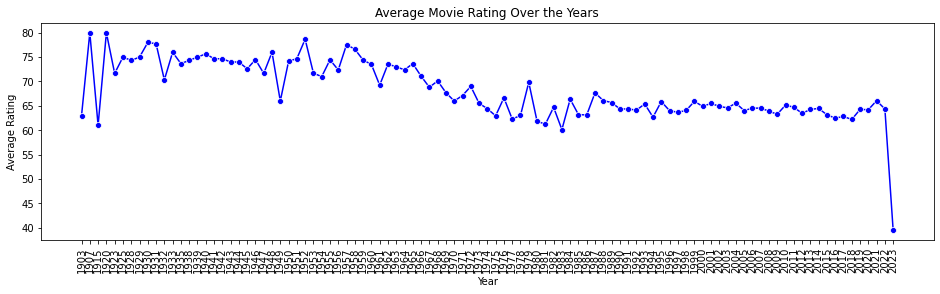

The Average Movie Rating over the years shows that:
- It shows from 1980 to 2020 the average rating Consistent Movie Quality
- There down fall after 2020 in movies may be because expectation of audience


In [79]:
# How has the average movie rating changed over the years? Plot the average rating for each year.  

# Group by 'year' and calculate the average rating ('score') for each year
average_rating_per_year = df.groupby('year')['score'].mean().reset_index()

# Showing line plot for average movie changed over years
plt.figure(figsize=(16,4))
sns.lineplot(data=average_rating_per_year, x='year', y='score', marker='o', color='b')
plt.title("Average Movie Rating Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()

# Description 
print("The Average Movie Rating over the years shows that:")
print("- It shows from 1980 to 2020 the average rating Consistent Movie Quality")
print("- There down fall after 2020 in movies may be because expectation of audience")

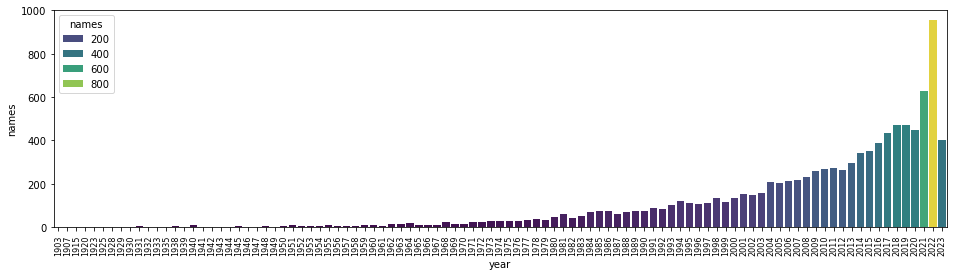

In [80]:
# Which years had the highest and lowest number of movie releases? Plot the number of movies released each year
gb = df.groupby("year").agg({"names" : "count"})
gb = gb.sort_values(by = "year")
plt.figure(figsize = (16,4))
sns.barplot(y="names", x = gb.index, data = gb, hue = "names",palette = "viridis")
plt.xticks(rotation = 90, fontsize = 8)
plt.show()


## **Multivariate Analysis: Analyze multiple variables together**
**Combine insights from multiple columns to explore complex relationships**

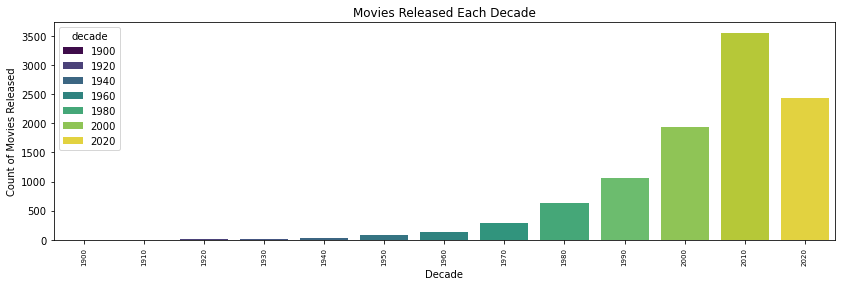

In [85]:
# Which genres are most popular in each decade? Create a bar plot showing the most frequent genres by decade.

df['year'] = pd.to_numeric(df['year'], errors='coerce')  # Convert to numeric, set errors to NaN if conversion fails
df = df.dropna(subset=['year'])  # Remove rows where year couldn't be converted
df['year'] = df['year'].astype(int)  # Ensure it's integer

# Extract the decade
df['decade'] = (df['year'] // 10) * 10  # Convert year to decade

# Group by decade
gb = df.groupby('decade').agg({'genre': 'count'})

# Plot
plt.figure(figsize=(14, 4))
sns.barplot(x=gb.index, y=gb['genre'],hue = gb.index, palette='viridis')
plt.ylabel('Count of Movies Released')
plt.xlabel('Decade')
plt.title('Movies Released Each Decade')
plt.xticks(rotation=90, fontsize=7)
plt.show()



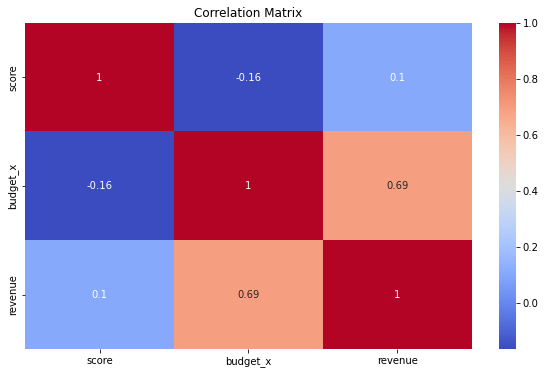

In [55]:
#Plot a heatmap or pairplot to examine relationships between budget, revenue, scores.
plt.figure(figsize=(10,6))
sns.heatmap(df[['score', 'budget_x', 'revenue']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## **Insights and Summary**
**Task: Task: Summarize key findings**

#### **1. Budget and Revenue Correlation:**
- There is a **strong positive correlation** (0.67) between **budget** and **revenue**, indicating that movies with higher budgets tend to generate more revenue. This suggests that investing more in movie production is likely to lead to higher financial returns. However, it is important to note that while a higher budget increases the chances of higher revenue, it does not guarantee success. Some high-budget films may still fail to generate expected returns, and there are mid-budget films that perform better than anticipated.

#### **2. Consistent Movie Ratings Over Time:**
- From **1980 to 2020**, the average **IMDB ratings** have remained relatively **consistent**, showing that movie quality, as measured by user ratings, has not drastically changed over time. However, there has been a **slight decline after 2020**, which could be attributed to shifting audience expectations, a decrease in movie-going experiences due to external factors (such as the pandemic), or a change in the types of content being produced. This trend suggests that while movie quality has remained stable, audience preferences and expectations are evolving.

#### **3. Genre-Specific Trends in Budget and Ratings:**
- Certain **genres** like **Fantasy**, **Drama**, and **Crime** tend to receive **higher average ratings**, while **Action** movies often have **lower budgets** compared to **Comedy** and **Drama** films. This shows that more dramatic or fantasy-driven films may receive better audience ratings, possibly due to stronger narratives or unique storytelling. In contrast, Action films often have lower production costs but can still generate significant box-office returns, showing that action-based content might be more accessible or widely popular despite its lower production costs.
